In [1]:
from lens2D import lens
from lights2D import lights
from tracelight2D import trace
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

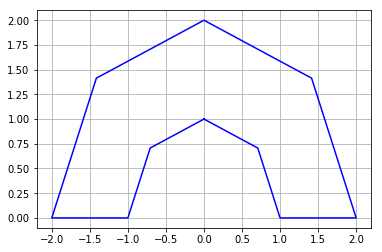

In [2]:
a = lens(2)
a.sample_convex_lens()
a.show_lens()
a.build_surface()
a.normalize_surface()
#pprint(a.inner_surface)

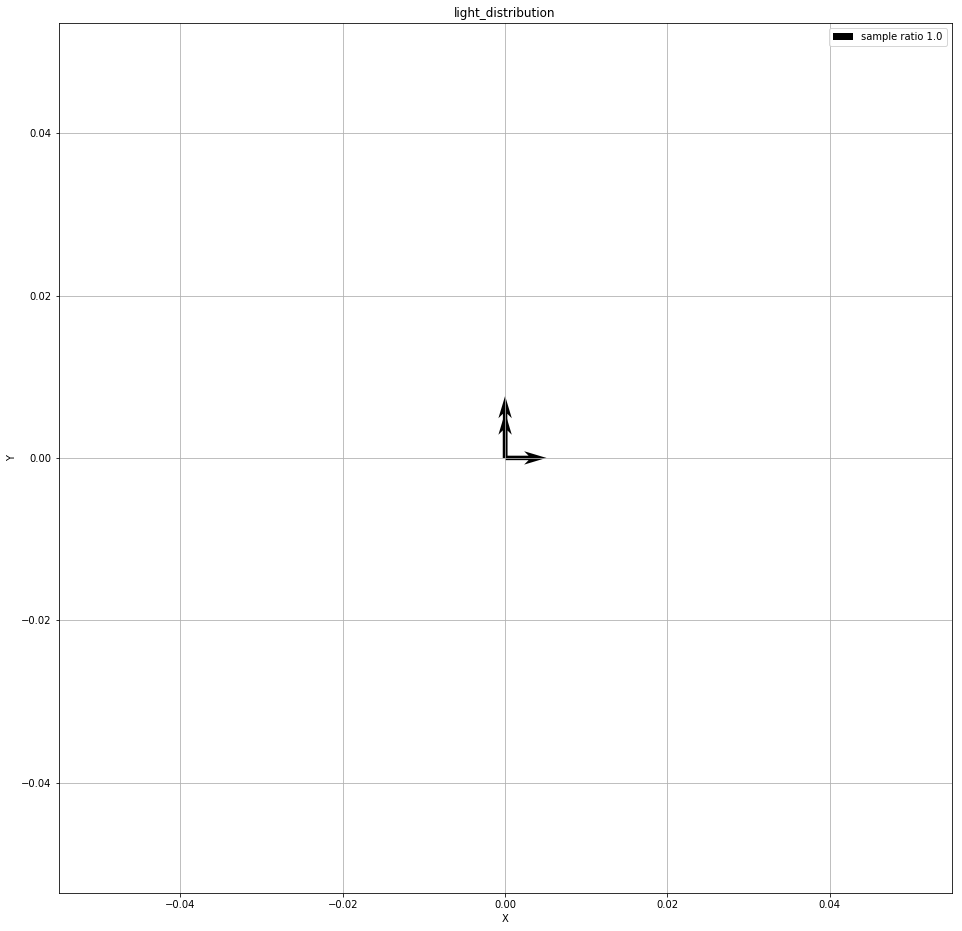

In [3]:
b=lights(1,3,np.array([[0.484, 100, 0,0, 10,0], [0.485, 50, 0,0, 0,15], [0.485, 50, 0,0, 0,11]]))
#b.normalize_beam()
b.light_distribution(1.0)

In [4]:
a = lens(2)
a.sample_convex_lens()
a.build_surface()
a.normalize_surface()
#pprint(a.upper_surface)
#pprint(a.lower_surface)
#print(a.upper_surface.shape, a.lower_surface.shape)
#print(a.get_surfaces().shape)
b=lights(1,3,np.array([[0.4, 100, 0,0, 1.0,0], [0.5, 100, 0,0, 0,1.0], [0.6, 100, 0,0, 1.0,1.0]]))
b.normalize_beam()
in_len_beams, out_len_beams = trace().GPU_reflect_refract(a.get_surfaces(), b.beams, 1.0, 1.48, 10)
unif, hist = trace().uniformity(np.array([0,-1,10]), out_len_beams, 20, 3)

In [5]:
in_len_beams, out_len_beams

(array([[ 5.00000000e-01,  2.97823153e-08,  1.12132704e+00,
          1.53552198e+00,  2.07871273e-01, -9.78154719e-01],
        [ 5.00000000e-01,  3.77884589e-07,  1.12133479e+00,
          1.53553355e+00,  9.83105183e-01,  1.83025494e-01],
        [ 5.00000000e-01,  5.40649516e-08,  1.35434878e+00,
          1.43898916e+00,  2.07871139e-01, -9.78155077e-01],
        [ 5.00000000e-01,  6.85991438e-07,  1.35435653e+00,
          1.43900073e+00,  9.83105719e-01,  1.83026835e-01],
        [ 5.00000000e-01,  6.82692473e-07,  9.82601225e-01,
          1.83078209e-05,  5.65741062e-01,  8.24580729e-01],
        [ 5.00000000e-01,  8.70737040e-06,  9.82603908e-01,
          4.59460080e-06,  8.37296784e-01, -5.46741307e-01],
        [ 5.00000000e-01,  5.04519839e-08,  1.47431791e+00,
          1.26905739e+00, -9.78155375e-01, -2.07870886e-01],
        [ 5.00000000e-01,  1.29299440e-06,  1.47433555e+00,
          1.26906562e+00,  7.86389172e-01,  6.17728770e-01],
        [ 5.00000000e-01,  1.704

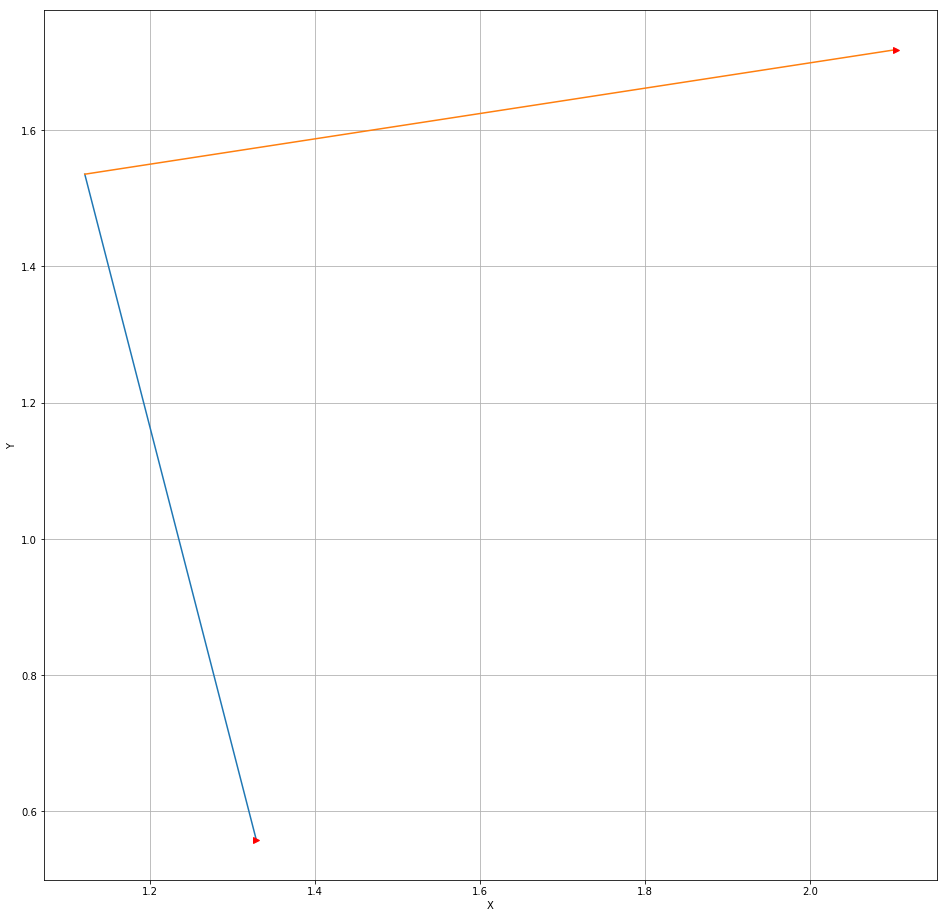

In [6]:
plt.figure(figsize=(16,16))
for i in range(2):
    plt.plot([in_len_beams[i,2], in_len_beams[i,2]+in_len_beams[i,4]],[in_len_beams[i,3], in_len_beams[i,3]+in_len_beams[i,5]],'-')
    plt.plot(in_len_beams[i,2]+in_len_beams[i,4],in_len_beams[i,3]+in_len_beams[i,5],'>r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [7]:
import time
start_time = time.time()
b = lights(8.9, 30000)
b.random_beams('CXA1507_LED1.txt')
b.add_beams_energy(-999)
elapsed_time = time.time() - start_time

In [8]:
print(elapsed_time/60)

0.08100001811981201


In [9]:
print(b.beams.nbytes)

720000


In [10]:
start_time = time.time()
unif, hist = trace().uniformity(np.array([0,-1,500]), b.beams, 8000, 100)
elapsed_time = time.time() - start_time
print(elapsed_time/60)
print(unif)
print(b.beams.shape)

0.005594313144683838
0.10770367700072098
(30000, 6)


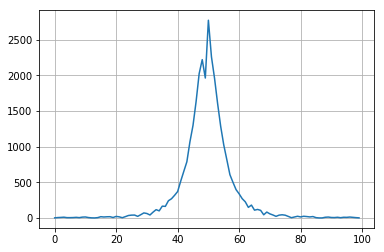

In [11]:
plt.figure()
plt.plot([i for i in range(100)], hist, '-')
plt.grid(True)
plt.show
histt = hist

In [12]:
import re
from math import sqrt
ans = list()
for line in open('tracepro.txt', 'r', encoding='UTF-8'):
    if line[0]==' ' or line[0]=='	':
        #print(line)
        line = re.sub(r'\s+', ' ', line)
        tmp = line.split()
        ans.append(tmp[6:12])
ans = np.array(ans).astype(np.float32)
for i in range(ans.shape[0]):
    ans[i, 4] = sqrt(ans[i, 4]*ans[i, 4]+ans[i, 3]*ans[i, 3])*(ans[i, 4]*ans[i, 3]/(abs(ans[i, 4])*abs(ans[i, 4])))
    ans[i, 3] = ans[i, 2]
    ans[i, 2] = sqrt(ans[i, 0]*ans[i, 0]+ans[i, 1]*ans[i, 1])*(ans[i, 0]*ans[i, 1]/(abs(ans[i, 0])*abs(ans[i, 1])))
    ans[i, 1] = 1
    ans[i, 0] = 0
print(ans.shape)

(30000, 6)


In [13]:
unif, hist = trace().uniformity(np.array([0,-1,500]), ans, 8000, 100)
print(unif)

0.12531727651690597


<function matplotlib.pyplot.show(*args, **kw)>

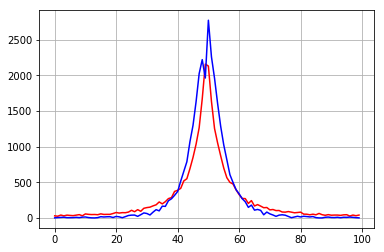

In [14]:
plt.figure()
plt.plot([i for i in range(100)], hist, 'r-')
plt.plot([i for i in range(100)], histt, 'b-')
plt.grid(True)
plt.show